### KHAI BÁO THƯ VIÊN

In [59]:
import pandas as pd 
import numpy as np

## Đọc dữ liệu

In [60]:
data = pd.read_csv('diabetes.csv')
data.head(5) #lấy 5 dòng đầu dữ liệu

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
data.shape ## lấy số hàng số cột dữ liêuk

(768, 9)

In [62]:
data.describe() ##mô tả dữ liệu

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Đếm số cột NULL

In [63]:
data.isna().sum()
print("number of rows with glucose value 0 is: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}" .format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows with Isulin 0 is: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(data.loc[data['Age'] == 0])))


number of rows with glucose value 0 is: 5
number of rows with missing BloodPressure 0 is: 35
number of rows with missing skin thikness 0 is: 227
number of rows with Isulin 0 is: 374
number of rows with BMI 0 is: 11
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


### Xử lý NULL bằng cách thay thế null bằng mean

In [64]:
from sklearn.impute import SimpleImputer # import thư viện thay thế các missing value
imputer = SimpleImputer(strategy='mean', missing_values=0) # Khởi tạo imputer
imputer = imputer.fit(data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]) # huấn luyện imputer
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.transform(data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]) # thay thế dữ liệu bằng dữ liệu đã huấn luyện 

## Ghi dữ liệu ra file

In [65]:
data.to_csv("outputads.csv", index = False)

## Check lại giá trị các cột đã hết null chưa

In [66]:
data.isna().sum()
print("number of rows with glucose value 0 is: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}" .format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows with Isulin 0 is: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(data.loc[data['Age'] == 0])))


number of rows with glucose value 0 is: 0
number of rows with missing BloodPressure 0 is: 0
number of rows with missing skin thikness 0 is: 0
number of rows with Isulin 0 is: 0
number of rows with BMI 0 is: 0
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


## Đếm số dữ liệu data bị bệnh và không bị bệnh

In [67]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Vẽ biểu đồ trực quan output

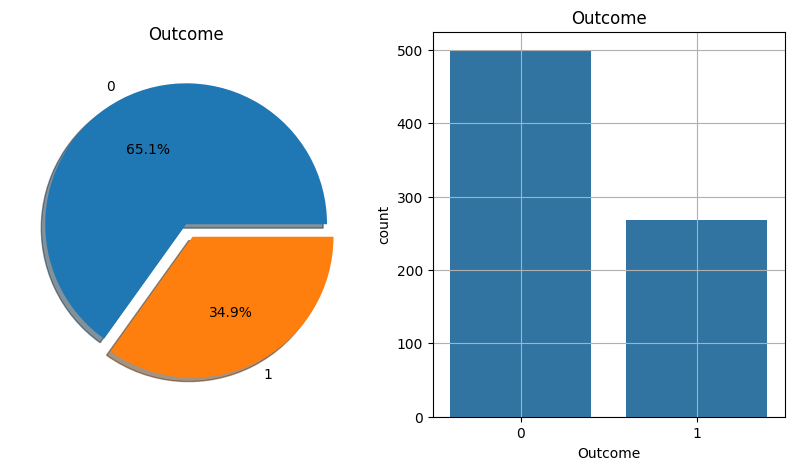

In [68]:
import seaborn as sns # giúp vẽ biểu đồ đẹp hơn
from matplotlib import pyplot as plt

# outcome
f, ax = plt.subplots(1, 2, figsize=(10,5))
data['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=data, ax=ax[1])
ax[1].set_title('Outcome')
N, P = data['Outcome'].value_counts()


plt.grid()
plt.show()

#### Chia tập dữ liệu: 80% train 20% test

In [69]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='Outcome', axis=1) # đầu vào
Y = data['Outcome'] # đầu ra
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

Đánh giá mức độ tương quan của từng cột ảnh hưởng tới kết quả cuối cùng
Giá trị lớn hơn 0: Đặc trưng có sự phụ thuộc (đóng góp thông tin) vào biến mục tiêu. Giá trị càng lớn, đặc trưng càng quan trọng.
Giá trị bằng 0: Đặc trưng không có mối quan hệ với biến mục tiêu hoặc không đóng góp thông tin.

In [70]:
from sklearn.feature_selection import mutual_info_classif # hàm dùng để tính thông tin tương hỗ

mutual_info = mutual_info_classif(x_train, y_train, random_state=0)
mutual_info

array([0.01555395, 0.11796705, 0.01509219, 0.01035643, 0.02548305,
       0.07923143, 0.        , 0.04601336])

In [71]:
mutual_info = pd.Series(mutual_info) # chuyển thảnh kiểu dữ liệu pd.Series
mutual_info.index = x_train.columns # thay chỉ số bằng tên x_train
mutual_info.sort_values(ascending = False) # sắp xếp giảm dần

Glucose                     0.117967
BMI                         0.079231
Age                         0.046013
Insulin                     0.025483
Pregnancies                 0.015554
BloodPressure               0.015092
SkinThickness               0.010356
DiabetesPedigreeFunction    0.000000
dtype: float64

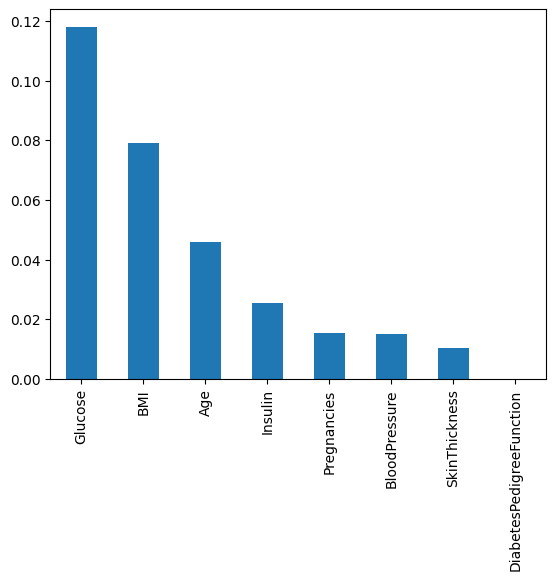

In [72]:
plt.Figure(figsize=(20,8))
mutual_info.sort_values(ascending = False).plot.bar();

Vì yếu tố ảnh hưởng của lịch sử gia đình ảnh hưởng ít tới kết quả => loại bỏ để tối ưu thuật toán

In [73]:
data.drop(columns='DiabetesPedigreeFunction', axis=1, inplace=True)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,33,1


In [74]:
y_train.value_counts()

Outcome
0    393
1    221
Name: count, dtype: int64

Cân bằng dữ liệu với adasyn

In [75]:
from imblearn.over_sampling import ADASYN
import numpy as np

# Khởi tạo ADASYN
ada = ADASYN(sampling_strategy='minority', random_state=0)

# Áp dụng ADASYN để cân bằng dữ liệu
X_adasyn, y_adasyn = ada.fit_resample(x_train, y_train)

# Đếm số lượng mẫu trong mỗi lớp sau khi cân bằng
print("Số lượng mẫu trong mỗi lớp sau khi dùng ADASYN:")
print(np.bincount(y_adasyn))


Số lượng mẫu trong mỗi lớp sau khi dùng ADASYN:
[393 390]


Vẽ biểu đồ trước khi adasyn

<bound method Axes.set of <Axes: title={'center': 'Outcome'}, ylabel='count'>>

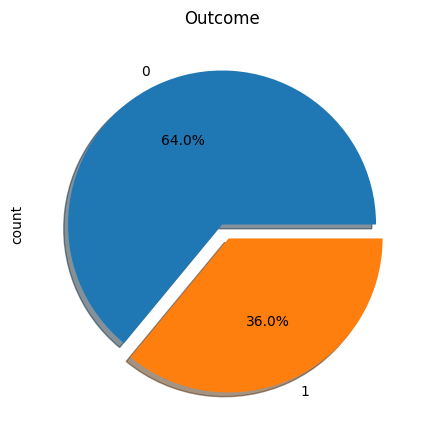

In [76]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
y_train.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax, shadow=True)
ax.set_title('Outcome')
ax.set

Vẽ biểu đồ sau khi Adasyn

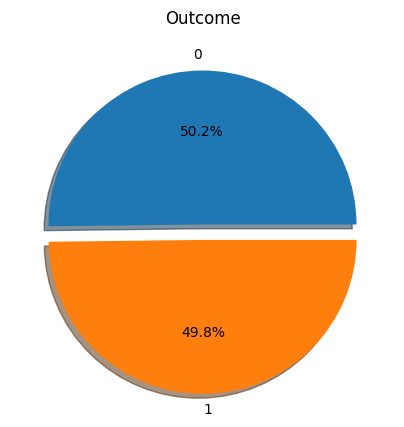

In [77]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
y_adasyn.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax, shadow=True)
ax.set_title('Outcome')
ax.set_ylabel('')
plt.show()

#### DECISION TREE


Tạo ra cây với các tầng khác nhau, sau đó huấn luyện mô hình tại từng tầng và kiểm tra độ chính xác tại mỗi tầng
Phân tích ảnh hưởng của tham số max_depth đến độ chính xác của mô hình trên tập huấn luyện và kiểm tra.

Depth =  2 , Training Accuracy =  0.722860791826309 , Test Accuracy =  0.7337662337662337 , Diff =  1.090544193992471 %
Depth =  3 , Training Accuracy =  0.7445721583652618 , Test Accuracy =  0.6688311688311688 , Diff =  7.574098953409303 %
Depth =  4 , Training Accuracy =  0.7777777777777778 , Test Accuracy =  0.7012987012987013 , Diff =  7.6479076479076475 %
Depth =  5 , Training Accuracy =  0.8071519795657727 , Test Accuracy =  0.7077922077922078 , Diff =  9.935977177356492 %
Depth =  6 , Training Accuracy =  0.8441890166028098 , Test Accuracy =  0.7077922077922078 , Diff =  13.639680881060201 %
Depth =  7 , Training Accuracy =  0.879948914431673 , Test Accuracy =  0.7207792207792207 , Diff =  15.916969365245226 %
Depth =  8 , Training Accuracy =  0.9054916985951469 , Test Accuracy =  0.7012987012987013 , Diff =  20.419299729644557 %
Depth =  9 , Training Accuracy =  0.933588761174968 , Test Accuracy =  0.6818181818181818 , Diff =  25.177057935678626 %
Depth =  10 , Training Accurac

Text(0, 0.5, 'Accuracy')

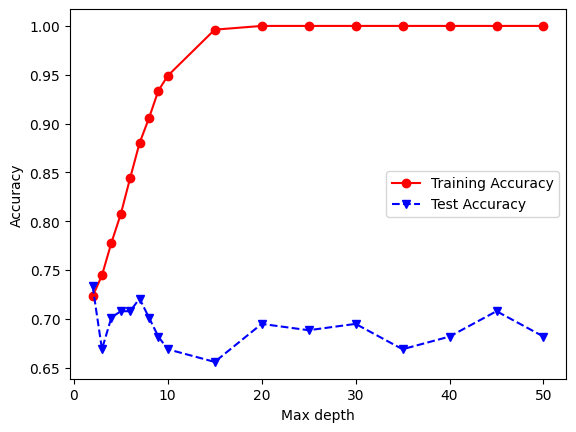

In [78]:
from sklearn import tree
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_adasyn, y_adasyn)
    y_predTrain = clf.predict(X_adasyn)
    y_predTest = clf.predict(x_test)
    trainAcc[index] = accuracy_score(y_adasyn, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), "%")
    index +=1

#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')


Tạo một cây quyết định với độ sâu tối đa là 2 và huấn luyện nó bằng dữ liệu đã được cung cấp 

In [79]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2, random_state=0)
dt.fit(X_adasyn, y_adasyn)

DecisionTreeClassifier(max_depth=2, random_state=0)

Kiểm tra độ chính xác training và test của thuật toán

In [80]:
from sklearn.metrics import classification_report
print("Training Accuracy is: ", dt.score(X_adasyn, y_adasyn))
print("Testing Accuracy is: ", dt.score(x_test, y_test))
X_test_prediction = dt.predict(x_test)

print(classification_report(y_test, X_test_prediction))

Training Accuracy is:  0.722860791826309
Testing Accuracy is:  0.7337662337662337
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       107
           1       0.56      0.60      0.58        47

    accuracy                           0.73       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.74      0.73      0.74       154



Kiểm tra chéo mô hình

In [81]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(dt,X,Y,cv=skfold)

tính toán và hiển thị độ chính xác trung bình (mean accuracy) và độ lệch chuẩn (standard deviation) của mô hình dựa trên kết quả kiểm tra chéo 

In [82]:
results=cv_score
print("Results = ", np.mean(results), "+/-", np.std(results))

Results =  0.7357015533486122 +/- 0.012208077742788486


# ** Bagging Decision tree**

In [83]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500,
                            max_samples=100, bootstrap=True, random_state=42,
                            oob_score=True)

bagging.fit(X_adasyn,y_adasyn)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, oob_score=True,
                  random_state=42)

In [84]:
from sklearn.metrics import confusion_matrix

y_pred=bagging.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))


[[86 21]
 [ 5 42]]
Accuracy Score 0.8311688311688312
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       107
           1       0.67      0.89      0.76        47

    accuracy                           0.83       154
   macro avg       0.81      0.85      0.82       154
weighted avg       0.86      0.83      0.84       154



In [85]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(bagging,X,Y,cv=skfold)

In [86]:
cv_score

array([0.74025974, 0.71428571, 0.75974026, 0.81699346, 0.75163399])

In [87]:
results=cv_score
print("Results = ", np.mean(results), "+/-",np.std(results))

Results =  0.7565826330532213 +/- 0.03388036119387347


#### *GRID SEARCH ON SVM*

MinMaxScaler: thu hẹp khoảng cách giá trị

In [88]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Age']
scaler = MinMaxScaler()
scaler.fit(X_adasyn[cols_to_scale])
X_adasyn[cols_to_scale] = scaler.transform(X_adasyn[cols_to_scale])
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

In [89]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_clf = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

svm_grid.fit(X_adasyn, y_adasyn)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.771 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.662 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.609 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.622 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [90]:
svm_grid.best_estimator_
svm_bestgrid=svm_grid.best_estimator_
svm_bestgrid

SVC(C=10, gamma=1)

In [91]:
y_pred=svm_bestgrid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[79 28]
 [12 35]]
Accuracy Score 0.7402597402597403
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       107
           1       0.56      0.74      0.64        47

    accuracy                           0.74       154
   macro avg       0.71      0.74      0.72       154
weighted avg       0.77      0.74      0.75       154



K-fold cross validation(SVM)

In [92]:
skfold = StratifiedKFold(n_splits=5)
cv_score = cross_val_score(svm_grid,X,Y,cv=skfold)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [93]:
cv_score

array([0.74025974, 0.7012987 , 0.77272727, 0.78431373, 0.75163399])

In [94]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.750046685340803 +/- 0.02885587930842931


#### LOGISTIC REGRESSION

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
from sklearn.model_selection import GridSearchCV

grid_params = {
    'max_iter': [10000],
    'warm_start': [False, True],
    'penalty': ['l1', 'l2'],  # elasticnet chỉ dùng với saga
    'solver': ['liblinear', 'saga'],  # Cả hai đều hỗ trợ l1 và l2
}


lr_grid = GridSearchCV(
    LogisticRegression(),
    grid_params,
    verbose  = 1,
    scoring='accuracy',
    cv = 3,
    n_jobs = -1
    )
    
lr_grid.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga'],
                         'warm_start': [False, True]},
             scoring='accuracy', verbose=1)

In [96]:
lr_bestgrid=lr_grid.best_estimator_

In [97]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[79 28]
 [12 35]]
Accuracy Score 0.7402597402597403
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       107
           1       0.56      0.74      0.64        47

    accuracy                           0.74       154
   macro avg       0.71      0.74      0.72       154
weighted avg       0.77      0.74      0.75       154



Logistic regression K fold

In [98]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(lr_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7643578643578642 +/- 0.019044607828292655


##### *Gausien Naive Bays*

In [100]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(GaussianNB(), 
                 param_grid=params_NB, 
                 cv=3,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_adasyn, y_adasyn)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [101]:
gs_NB.best_params_

{'var_smoothing': np.float64(0.15199110829529336)}

In [102]:
gs_NB=gs_NB.best_estimator_

In [104]:
y_pred=gs_NB.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[85 22]
 [12 35]]
Accuracy Score 0.7792207792207793
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       107
           1       0.61      0.74      0.67        47

    accuracy                           0.78       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.80      0.78      0.78       154



In [105]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(GaussianNB(),X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7513453866395042 +/- 0.02026141123825363


#### *Random Forest*

In [107]:
from sklearn.ensemble import RandomForestClassifier

###The hyperparameter we got from grid search
rf=RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
### fit the randomized model
rf.fit(X_adasyn, y_adasyn)


RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)

In [108]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[88 19]
 [10 37]]
Accuracy Score 0.8116883116883117
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       107
           1       0.66      0.79      0.72        47

    accuracy                           0.81       154
   macro avg       0.78      0.80      0.79       154
weighted avg       0.83      0.81      0.82       154



In [109]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(rf,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7565996095407861 +/- 0.041070602398946346


#### *XGBOOST*

In [111]:
###The hyperparameter we got from grid search
from xgboost import XGBClassifier
xgbc = XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_adasyn, y_adasyn)

In [113]:
from sklearn.metrics import accuracy_score
y_pred=xgbc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[83 24]
 [ 9 38]]
Accuracy Score 0.7857142857142857
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       107
           1       0.61      0.81      0.70        47

    accuracy                           0.79       154
   macro avg       0.76      0.79      0.77       154
weighted avg       0.81      0.79      0.79       154



In [114]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(xgbc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7356845768610475 +/- 0.018522048141637028


#### *Ada Boost*

In [117]:
from sklearn.ensemble import AdaBoostClassifier


# Khởi tạo mô hình cơ sở

# Tạo AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, estimator=rf, learning_rate=1)

# Huấn luyện mô hình
abc.fit(X_adasyn, y_adasyn)

# Dự đoán và in báo cáo kết quả
print(classification_report(y_test, abc.predict(x_test)))


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.81      0.85       107
           1       0.65      0.79      0.71        47

    accuracy                           0.81       154
   macro avg       0.77      0.80      0.78       154
weighted avg       0.82      0.81      0.81       154



In [118]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(abc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

Results =  0.7604872251931075 +/- 0.04337503037732156


#### *KNN*

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_adasyn, y_adasyn)

# accuracy score on the test data
knn_prediction = knn.predict(x_test) 
knn_prediction_accuracy = accuracy_score(knn_prediction, y_test) 
print('Accuracy score of Test data: ', knn_prediction_accuracy)
print(classification_report(y_test, knn_prediction)) 

Accuracy score of Test data:  0.7402597402597403
              precision    recall  f1-score   support

           0       0.94      0.67      0.78       107
           1       0.55      0.89      0.68        47

    accuracy                           0.74       154
   macro avg       0.74      0.78      0.73       154
weighted avg       0.82      0.74      0.75       154



In [120]:
k = range(1, 100)
train_acc = []
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x) # Euclidean Distance Metric
    knn_clf.fit(X_adasyn, y_adasyn)
    y_pred = knn_clf.predict(x_test)
    train_acc.append(accuracy_score(y_adasyn, knn_clf.predict(X_adasyn)))
    test_acc.append(accuracy_score(y_test, y_pred))

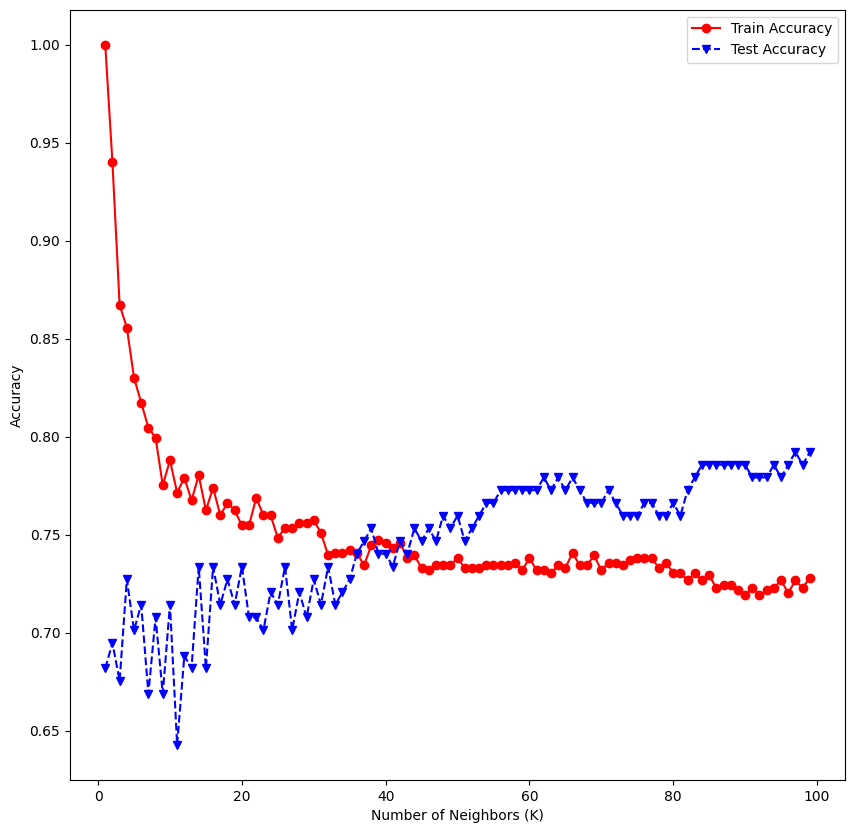

In [121]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy');

In [122]:
for x in k:
    print('Number of neighbors = ', x, "Train accuracy = ", train_acc[x-1], "Test Accuracy = ", test_acc[x-1], "Difference = ",
         (abs(train_acc[x-1] - test_acc[x-1])*100), "%")

Number of neighbors =  1 Train accuracy =  1.0 Test Accuracy =  0.6818181818181818 Difference =  31.818181818181824 %
Number of neighbors =  2 Train accuracy =  0.9399744572158365 Test Accuracy =  0.6948051948051948 Difference =  24.516926241064173 %
Number of neighbors =  3 Train accuracy =  0.8671775223499362 Test Accuracy =  0.6753246753246753 Difference =  19.185284702526083 %
Number of neighbors =  4 Train accuracy =  0.855683269476373 Test Accuracy =  0.7272727272727273 Difference =  12.841054220364567 %
Number of neighbors =  5 Train accuracy =  0.8301404853128991 Test Accuracy =  0.7012987012987013 Difference =  12.884178401419778 %
Number of neighbors =  6 Train accuracy =  0.8173690932311622 Test Accuracy =  0.7142857142857143 Difference =  10.308337894544795 %
Number of neighbors =  7 Train accuracy =  0.8045977011494253 Test Accuracy =  0.6688311688311688 Difference =  13.576653231825652 %
Number of neighbors =  8 Train accuracy =  0.7994891443167306 Test Accuracy =  0.7077

In [123]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [36],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose  = 1,
    cv = 10,
    return_train_score=False,
    scoring= 'accuracy',
    n_jobs = -1
    )
    
knn_grid.fit(X_adasyn, y_adasyn)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [36],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [124]:
knn_grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')

In [125]:
knn_bestgrid=knn_grid.best_estimator_

In [126]:
knn_bestgrid

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')

In [127]:
y_pred=knn_bestgrid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[69 38]
 [ 4 43]]
Accuracy Score 0.7272727272727273
              precision    recall  f1-score   support

           0       0.95      0.64      0.77       107
           1       0.53      0.91      0.67        47

    accuracy                           0.73       154
   macro avg       0.74      0.78      0.72       154
weighted avg       0.82      0.73      0.74       154



In [128]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(knn_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7526865291571173 +/- 0.03207268507717209


#### *Soft Voting*

In [129]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Danh sách các mô hình
estimators = []
estimators.append(('RF', RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)))
estimators.append(('SVC', SVC(C=100, gamma=0.1, probability=True)))
estimators.append(('ABC', AdaBoostClassifier(n_estimators=50, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1)))
estimators.append(('Bag', BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)))

# Voting Classifier với soft voting
Hyper_vot_soft = VotingClassifier(estimators=estimators, voting='soft')

# Huấn luyện mô hình
Hyper_vot_soft.fit(X_adasyn, y_adasyn)

# Dự đoán và đánh giá
y_pred = Hyper_vot_soft.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score: %f" % score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Soft Voting Score: 0.837662
[[87 20]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       107
           1       0.68      0.89      0.77        47

    accuracy                           0.84       154
   macro avg       0.81      0.85      0.82       154
weighted avg       0.86      0.84      0.84       154



In [130]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(Hyper_vot_soft,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

Results =  0.7552499787793906 +/- 0.02346724481138228


#### *ZeroR*

In [133]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_adasyn, y_adasyn)
y_pred = dummy_clf.predict(x_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_adasyn, dummy_clf.predict(X_adasyn)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       107
           1       0.00      0.00      0.00        47

    accuracy                           0.69       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.48      0.69      0.57       154

Train Accuracy:  0.5019157088122606
Test Accuracy:  0.6948051948051948


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [135]:
y_pred = dummy_clf.predict(x_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

#### *Auc Curve*

In [136]:
DTC2=BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
DTC2.fit(X_adasyn, y_adasyn)


DTC3=DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=0)
DTC3.fit(X_adasyn, y_adasyn)

rf_randomcv2= RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
rf_randomcv2.fit(X_adasyn, y_adasyn)

SVC2=SVC(C=100, gamma=0.1,probability=True)
SVC2.fit(X_adasyn, y_adasyn)

lr_grid2= lr_bestgrid
lr_grid2.fit(X_adasyn, y_adasyn)

gs_NB2=gs_NB
gs_NB2.fit(X_adasyn, y_adasyn)

XGB_clf2=XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)
XGB_clf2.fit(X_adasyn, y_adasyn)

knn_grid2= KNeighborsClassifier(n_neighbors=95,metric='manhattan', weights='distance')
knn_grid2.fit(X_adasyn, y_adasyn)


KNeighborsClassifier(metric='manhattan', n_neighbors=95, weights='distance')

In [137]:
final_roc_auc = []

In [139]:
#use the model to predict the target values for test dataset. We are storing the predicted class by all the models and we will use it to get the ROC AUC score
probas1 = dummy_clf.predict_proba(x_test)[:, 1]
probas2 = DTC2.predict_proba(x_test)[:, 1]
probas3 = knn_grid2.predict_proba(x_test)[:, 1]
probas4 = SVC2.predict_proba(x_test)[:, 1]
probas5 = rf_randomcv2.predict_proba(x_test)[:, 1]
probas6 = gs_NB2.predict_proba(x_test)[:, 1]
probas7 = abc.predict_proba(x_test)[:, 1]
probas8 = XGB_clf2.predict_proba(x_test)[:, 1]
probas9 = lr_grid2.predict_proba(x_test)[:, 1]
probas10 = Hyper_vot_soft.predict_proba(x_test)[:, 1]
probas11 = DTC3.predict_proba(x_test)[:, 1]

In [140]:
from sklearn.metrics import roc_curve

# get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, probas2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, probas3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, probas4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, probas5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, probas6)
false_positive_rate7, true_positive_rate7, threshold6 = roc_curve(y_test, probas7)
false_positive_rate8, true_positive_rate8, threshold6 = roc_curve(y_test, probas8)
false_positive_rate9, true_positive_rate9, threshold6 = roc_curve(y_test, probas9)
false_positive_rate10, true_positive_rate10, threshold6 = roc_curve(y_test, probas10)
false_positive_rate11, true_positive_rate11, threshold6 = roc_curve(y_test, probas11)

In [141]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score for ZeroR Classifier: ', roc_auc_score(y_test, probas1))
print('roc_auc_score for Bagging DecisionTree: ', roc_auc_score(y_test, probas2))
print('roc_auc_score for KNN Classifier: ', roc_auc_score(y_test, probas3))
print('roc_auc_score for SVM Classifier: ', roc_auc_score(y_test, probas4))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, probas5))
print('roc_auc_score for Naive Bays Classifier: ', roc_auc_score(y_test, probas6))
print('roc_auc_score for Ada Boost Classifier: ', roc_auc_score(y_test, probas7))
print('roc_auc_score for XG Boost Classifier: ', roc_auc_score(y_test, probas8))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, probas9))
print('roc_auc_score for Voting Classifier: ', roc_auc_score(y_test, probas10))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, probas11))

roc_auc_score for ZeroR Classifier:  0.5
roc_auc_score for Bagging DecisionTree:  0.8706502286736926
roc_auc_score for KNN Classifier:  0.886060847086896
roc_auc_score for SVM Classifier:  0.8874527739113143
roc_auc_score for Random Forest Classifier:  0.8683634917478624
roc_auc_score for Naive Bays Classifier:  0.875521972559157
roc_auc_score for Ada Boost Classifier:  0.8682640684032612
roc_auc_score for XG Boost Classifier:  0.8287930005965402
roc_auc_score for Logistic Regression:  0.8808908331676277
roc_auc_score for Voting Classifier:  0.8852654603300855
roc_auc_score for DecisionTree:  0.7312586995426527


In [142]:
final_roc_auc.append({'model_name': 'ZeroR Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})
final_roc_auc.append({'model_name': 'Bagging Decision Tree Classifier', 'fpr': false_positive_rate2, 'tpr': true_positive_rate2, 'auc': roc_auc_score(y_test, probas2)})
final_roc_auc.append({'model_name': 'KNeighbors Classifier', 'fpr': false_positive_rate3, 'tpr': true_positive_rate3, 'auc': roc_auc_score(y_test, probas3)})
final_roc_auc.append({'model_name': 'SVM Classifier', 'fpr': false_positive_rate4, 'tpr': true_positive_rate4, 'auc': roc_auc_score(y_test, probas4)})
final_roc_auc.append({'model_name': 'Random Forest Classifier', 'fpr': false_positive_rate5, 'tpr': true_positive_rate5, 'auc': roc_auc_score(y_test, probas5)})
final_roc_auc.append({'model_name': 'Naive Bays Classifier', 'fpr': false_positive_rate6, 'tpr': true_positive_rate6, 'auc': roc_auc_score(y_test, probas6)})
final_roc_auc.append({'model_name': 'Ada Boost Classifier', 'fpr': false_positive_rate7, 'tpr': true_positive_rate7, 'auc': roc_auc_score(y_test, probas7)})
final_roc_auc.append({'model_name': 'XG Boost Classifier', 'fpr': false_positive_rate8, 'tpr': true_positive_rate8, 'auc': roc_auc_score(y_test, probas8)})
final_roc_auc.append({'model_name': 'Logistic Regression', 'fpr': false_positive_rate9, 'tpr': true_positive_rate9, 'auc': roc_auc_score(y_test, probas9)})
final_roc_auc.append({'model_name': 'Voting Classifier', 'fpr': false_positive_rate10, 'tpr': true_positive_rate10, 'auc': roc_auc_score(y_test, probas10)})
final_roc_auc.append({'model_name': 'Decision Tree Classifier', 'fpr': false_positive_rate11, 'tpr': true_positive_rate11, 'auc': roc_auc_score(y_test, probas11)})

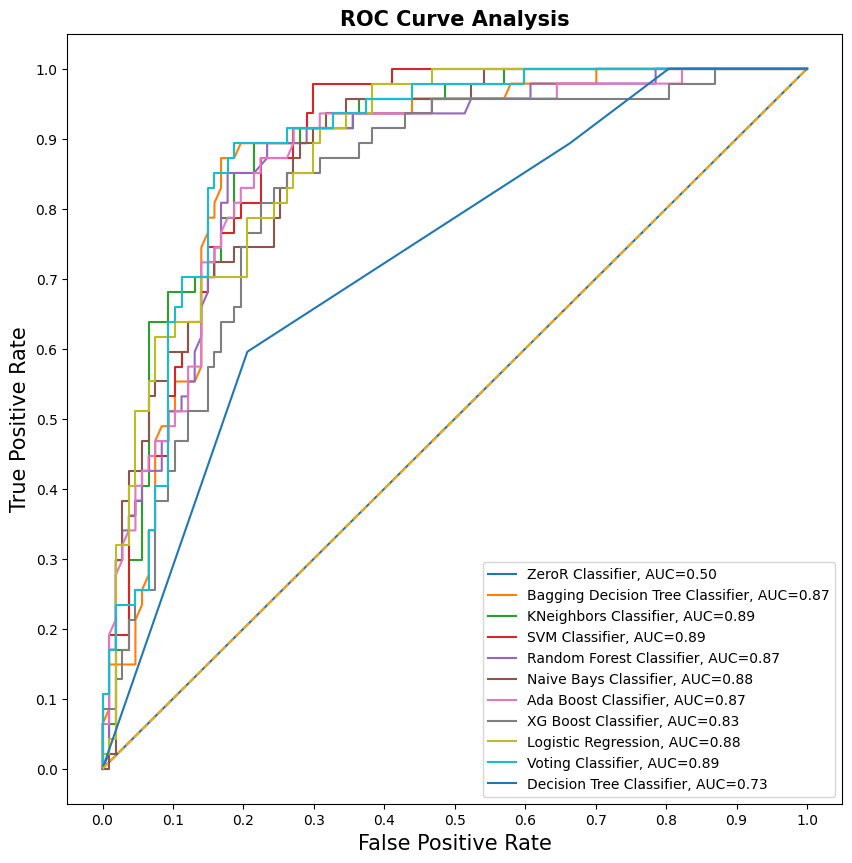

In [143]:
    fig = plt.figure(figsize=(10,10))

    for m in final_roc_auc:
        plt.plot(m['fpr'], 
                m['tpr'], 
                label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
        
    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':10}, loc='lower right')

    plt.show()